<h1>Importação dados b3</h1>

In [12]:
import pandas as pd

dados_b3 = pd.DataFrame()

dados_b3_04_10_2024 = pd.read_csv("D:\\CEDERJ\\2024.2\\tcc\\IVOptionPredictor\\projeto\\data\\b3data_2024.10.04.csv", sep=";")
dados_b3_11_10_2024 = pd.read_csv("D:\\CEDERJ\\2024.2\\tcc\\IVOptionPredictor\\projeto\\data\\b3data_2024.10.11.csv", sep=";")
dados_b3_18_10_2024 = pd.read_csv("D:\\CEDERJ\\2024.2\\tcc\\IVOptionPredictor\\projeto\\data\\b3data_2024.10.18.csv", sep=";")

dados_b3_04_10_2024['dtPregao'] = '2024.10.04'
dados_b3_11_10_2024['dtPregao'] = '2024.10.11'
dados_b3_18_10_2024['dtPregao'] = '2024.10.18'



dados_b3 = pd.concat([dados_b3, dados_b3_04_10_2024], axis = 0)
dados_b3 = pd.concat([dados_b3, dados_b3_11_10_2024], axis = 0)
dados_b3 = pd.concat([dados_b3, dados_b3_18_10_2024], axis = 0)

In [11]:
dados_b3_filtrado = dados_b3[dados_b3['dtPregao'] == '2024.10.11']

dados_b3_filtrado['datven'].unique()




array([      nan, 99991231., 20241018., 20241114., 20250117., 20250417.,
       20251219., 20250815., 20241220., 20250221., 20241011., 20241025.,
       20241101., 20241122., 20250919., 20250620., 20250516., 20260717.,
       20250321., 20250718., 20260220., 20260515., 20260417., 20261016.,
       20241108., 20251017., 20251121., 20260320., 20260619., 20260821.,
       20260116., 20260918., 20241213., 20241227., 20241016., 20241113.,
       20241218., 20250312., 20250115., 20250212., 20250416., 20250618.])

<h1>Analisando importação</h1>

In [4]:
dados_b3.info()

<class 'pandas.core.frame.DataFrame'>
Index: 37176 entries, 0 to 15754
Data columns (total 31 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   cod_bdi        37172 non-null  float64
 1   cod_neg        37172 non-null  object 
 2   codigo_origem  2 non-null      object 
 3   codisi         37172 non-null  object 
 4   data_geracao   2 non-null      float64
 5   data_pregao    37172 non-null  float64
 6   datven         37172 non-null  float64
 7   desmes         37172 non-null  float64
 8   espec          37172 non-null  object 
 9   fatcot         37172 non-null  float64
 10  indopc         37172 non-null  float64
 11  modref         37172 non-null  object 
 12  nom_res        37172 non-null  object 
 13  nome_arquivo   2 non-null      object 
 14  prazot         32163 non-null  float64
 15  preabe         37172 non-null  object 
 16  preexe         37172 non-null  object 
 17  premax         37172 non-null  object 
 18  premed     

<h1>Tratamento dos dados</h1>

In [18]:
dados_b3_filtrado = dados_b3[(dados_b3['tp_merc'] == 70) | (dados_b3['tp_merc'] == 80)]

dados_b3_filtrado = dados_b3_filtrado[(dados_b3_filtrado['nom_res'].str.startswith('GGBR')) | (dados_b3_filtrado['nom_res'].str.startswith('ABEV')) | (dados_b3_filtrado['nom_res'].str.startswith('ITSA')) | (dados_b3_filtrado['nom_res'].str.startswith('B3SA')) | (dados_b3_filtrado['nom_res'].str.startswith('BBDC')) | (dados_b3_filtrado['nom_res'].str.startswith('MGLU'))]

dados_b3_filtrado['preofc'] = dados_b3_filtrado['preofc'].str.replace(',', '.', regex=False)
dados_b3_filtrado['preofv'] = dados_b3_filtrado['preofv'].str.replace(',', '.', regex=False)
dados_b3_filtrado['preult'] = dados_b3_filtrado['preult'].str.replace(',', '.', regex=False)
dados_b3_filtrado['premed'] = dados_b3_filtrado['premed'].str.replace(',', '.', regex=False)
dados_b3_filtrado['preult'] = pd.to_numeric(dados_b3_filtrado['preult'])
dados_b3_filtrado['preofv'] = pd.to_numeric(dados_b3_filtrado['preofv'])
dados_b3_filtrado['preofc'] = pd.to_numeric(dados_b3_filtrado['preofc'])
dados_b3_filtrado['premed'] = pd.to_numeric(dados_b3_filtrado['premed'])
# dados_b3_filtrado = dados_b3_filtrado[(dados_b3_filtrado['preult'] != 0) | (dados_b3_filtrado['preult'] != 0)]
dados_b3_filtrado = dados_b3_filtrado[(dados_b3_filtrado['preofv'] != 0) | (dados_b3_filtrado['preofv'] != 0)]
dados_b3_filtrado = dados_b3_filtrado[(dados_b3_filtrado['preofc'] != 0) | (dados_b3_filtrado['preofc'] != 0)]
dados_b3_filtrado = dados_b3_filtrado[(dados_b3_filtrado['premed'] != 0) | (dados_b3_filtrado['premed'] != 0)]


dados_b3_filtrado['callPut'] = 0
dados_b3_filtrado.loc[dados_b3_filtrado['tp_merc'] == 70, 'callPut'] = 'call'
dados_b3_filtrado.loc[dados_b3_filtrado['tp_merc'] == 80, 'callPut'] = 'put'

def extrair_decimal(cod_neg):
    sufixo = cod_neg[5:]
    
    try:
        strike = float(sufixo[0:2] + '.' + sufixo[2:])
        if strike > 50:
            strike = strike/10
        return strike
    except:
        return 0
    
# Criar a nova coluna com o valor decimal extraído
dados_b3_filtrado['strike'] = dados_b3_filtrado['cod_neg'].apply(extrair_decimal)
# dados_b3_filtrado['premio'] = (dados_b3_filtrado['preofc'] + dados_b3_filtrado['preult']) /2
dados_b3_filtrado['premio'] = dados_b3_filtrado['premed']
dados_b3_filtrado['taxaDeJuros'] = 0.11
dados_b3_filtrado['dado_original'] = 1

def determinar_vencimento(vencimento):

    diasAteVencDict_04_10_2024 = {20250321: 116,
                        20241114: 30,
                        20241220: 55,
                        20250221: 98,
                        20250117: 73,
                        20241101: 21,
                        20241108: 26}
    diasAteVencDict_18_10_2024 = {20241227: 51,
                    20241129: 31,
                    20241220: 44,
                    20241218: 46}
    diasAteVencDict_11_10_2024 = {20241122: 31,
                    20241213: 46,
                    20241218: 49,
                    20241220: 51,
                    20241227: 56}
    diasAteVencDict = {'2024.10.04': diasAteVencDict_04_10_2024,
              '2024.10.11': diasAteVencDict_11_10_2024,
              '2024.10.18': diasAteVencDict_18_10_2024}
    try:
        dtPregaoDict = diasAteVencDict[vencimento['dtPregao']]
        return dtPregaoDict[vencimento['datven']]
    except:
        return 0

dados_b3_filtrado['diasAteVencimento'] = dados_b3_filtrado.apply(determinar_vencimento, axis=1)
dados_b3_filtrado = dados_b3_filtrado[dados_b3_filtrado['diasAteVencimento'] != 0]

spot_ABEV = 13.28
spot_ITSA = 10.62
spot_B3SA = 10.75
spot_BBDC = 15.06
spot_MGLU = 9.67
spot_GGBR = 19.18
dados_b3_filtrado['spot'] = 0
dados_b3_filtrado.loc[dados_b3_filtrado['cod_neg'].str.startswith('ABEV'), 'spot'] = spot_ABEV
dados_b3_filtrado.loc[dados_b3_filtrado['cod_neg'].str.startswith('ITSA'), 'spot'] = spot_ITSA
dados_b3_filtrado.loc[dados_b3_filtrado['cod_neg'].str.startswith('B3SA'), 'spot'] = spot_B3SA
dados_b3_filtrado.loc[dados_b3_filtrado['cod_neg'].str.startswith('BBDC'), 'spot'] = spot_BBDC
dados_b3_filtrado.loc[dados_b3_filtrado['cod_neg'].str.startswith('MGLU'), 'spot'] = spot_MGLU
dados_b3_filtrado.loc[dados_b3_filtrado['cod_neg'].str.startswith('GGBR'), 'spot'] = spot_GGBR

dados_b3_filtrado = dados_b3_filtrado[['cod_neg','dtPregao','diasAteVencimento','datven','strike','premio','taxaDeJuros','spot','callPut','dado_original']]

dados_b3_filtrado

C:\Users\Public\Documents\Wondershare\CreatorTemp\ipykernel_15596\1121613332.py:20: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value 'call' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  dados_b3_filtrado.loc[dados_b3_filtrado['tp_merc'] == 70, 'callPut'] = 'call'
C:\Users\Public\Documents\Wondershare\CreatorTemp\ipykernel_15596\1121613332.py:78: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '13.28' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  dados_b3_filtrado.loc[dados_b3_filtrado['cod_neg'].str.startswith('ABEV'), 'spot'] = spot_ABEV


,cod_neg,dtPregao,diasAteVencimento,datven,strike,premio,taxaDeJuros,spot,callPut,dado_original
1680,ABEVK130,2024.10.04,30,20241114.0,13.0,0.70,0.11,13.28,call,1
1684,ABEVK115,2024.10.04,30,20241114.0,11.5,0.03,0.11,13.28,call,1
1686,ABEVK140,2024.10.04,30,20241114.0,14.0,0.23,0.11,13.28,call,1
1687,ABEVK150,2024.10.04,30,20241114.0,15.0,0.05,0.11,13.28,call,1
1688,ABEVK160,2024.10.04,30,20241114.0,16.0,0.02,0.11,13.28,call,1
...,...,...,...,...,...,...,...,...,...,...
10082,MGLUL119,2024.10.18,44,20241220.0,11.9,0.26,0.11,9.67,call,1
10084,MGLUL134,2024.10.18,44,20241220.0,13.4,0.13,0.11,9.67,call,1
10101,MGLUX126,2024.10.18,44,20241220.0,12.6,0.98,0.11,9.67,put,1
10156,MGLUX900,2024.10.18,44,20241220.0,9.0,0.59,0.11,9.67,put,1


In [19]:
# Adicione o diretório raiz do projeto ao sys.path
import os
import sys

# Obtém o diretório de trabalho atual
project_root = os.getcwd()

# Se necessário, ajuste o caminho para subir dois diretórios
project_root = os.path.abspath(os.path.join(project_root, '..', '..'))
sys.path.append(project_root)

from src.IVCalculator.IterativeMethods.NewtonRaphson import newton_raphson_for_volatility

def calculate_volatility(row):
    S = row['spot']
    K = row['strike']
    T = row['diasAteVencimento']/ 252
    r = row['taxaDeJuros']
    market_price = row['premio']
    call_or_put = row['callPut']
    
    vol = newton_raphson_for_volatility(S, K, T, r, market_price, call_or_put)
    
    if ( vol != -1 and vol < 100):        
        print(f"############################# {row.name} volatilidade {vol}")

    return vol

dados_b3_filtrado['vol_implicita'] = dados_b3_filtrado.apply(calculate_volatility, axis=1)

volatilidade: 0.24460915988632517
############################# 1680 volatilidade 0.24460915988632517
volatilidade: 0.2406207971059231
############################# 1686 volatilidade 0.2406207971059231
volatilidade: 0.23848694351079044
############################# 1687 volatilidade 0.23848694351079044
volatilidade: 0.2794010651882369
############################# 1688 volatilidade 0.2794010651882369
volatilidade: 0.23690014539276535
############################# 1692 volatilidade 0.23690014539276535
volatilidade: 0.21030123452989524
############################# 1693 volatilidade 0.21030123452989524
volatilidade: 0.22616108632287726
############################# 1709 volatilidade 0.22616108632287726
volatilidade: 0.3076858397224729
############################# 1716 volatilidade 0.3076858397224729
volatilidade: 0.24126175366136915
############################# 1717 volatilidade 0.24126175366136915
volatilidade: 0.22262229369034608
############################# 1726 volatilidade 0.2226

In [20]:
dados_b3_filtrado.to_csv("dados_b3_ingeridos.csv")

In [35]:
import pandas as pd
dados_b3_filtrado = pd.read_csv("dados_b3_ingeridos.csv", sep=",")
dados_b3_filtrado.loc[dados_b3_filtrado['vol_implicita'] == -1, 'vol_implicita'] = 0

spot_ABEV_04_10_2024 = 13.28
spot_ITSA_04_10_2024 = 10.62
spot_B3SA_04_10_2024 = 10.75
spot_BBDC_04_10_2024 = 15.06
spot_MGLU_04_10_2024 = 9.67
spot_GGBR_04_10_2024 = 19.18

spot_ABEV_11_10_2024 = 12.88
spot_ITSA_11_10_2024 = 10.47
spot_B3SA_11_10_2024 = 10.69
spot_BBDC_11_10_2024 = 14.80
spot_MGLU_11_10_2024 = 9.67
spot_GGBR_11_10_2024 = 18.43

spot_ABEV_18_10_2024 = 12.88
spot_ITSA_18_10_2024 = 10.61
spot_B3SA_18_10_2024 = 10.65
spot_BBDC_18_10_2024 = 15.32
spot_MGLU_18_10_2024 = 9.45
spot_GGBR_18_10_2024 = 18.40

dados_b3_filtrado

,Unnamed: 0,cod_neg,dtPregao,diasAteVencimento,datven,strike,premio,taxaDeJuros,spot,callPut,dado_original,vol_implicita
0,1680,ABEVK130,2024.10.04,30,20241114.0,13.0,0.70,0.11,13.28,call,1,0.244609
1,1684,ABEVK115,2024.10.04,30,20241114.0,11.5,0.03,0.11,13.28,call,1,0.000000
2,1686,ABEVK140,2024.10.04,30,20241114.0,14.0,0.23,0.11,13.28,call,1,0.240621
3,1687,ABEVK150,2024.10.04,30,20241114.0,15.0,0.05,0.11,13.28,call,1,0.238487
4,1688,ABEVK160,2024.10.04,30,20241114.0,16.0,0.02,0.11,13.28,call,1,0.279401
...,...,...,...,...,...,...,...,...,...,...,...,...
424,10082,MGLUL119,2024.10.18,44,20241220.0,11.9,0.26,0.11,9.67,call,1,0.532283
425,10084,MGLUL134,2024.10.18,44,20241220.0,13.4,0.13,0.11,9.67,call,1,0.000000
426,10101,MGLUX126,2024.10.18,44,20241220.0,12.6,0.98,0.11,9.67,put,1,0.000000
427,10156,MGLUX900,2024.10.18,44,20241220.0,9.0,0.59,0.11,9.67,put,1,0.619622


In [9]:
dados_b3_filtrado

,Unnamed: 0,cod_neg,data_pregao,diasAteVencimento,datven,strike,premio,taxaDeJuros,spot,callPut,dado_original,vol_implicita
0,1680,ABEVK130,20241004,30,20241114,13.0,0.70,0.11,13.28,call,1,0.244609
1,1684,ABEVK115,20241004,30,20241114,11.5,0.03,0.11,13.28,call,1,-1.000000
2,1686,ABEVK140,20241004,30,20241114,14.0,0.23,0.11,13.28,call,1,0.240621
3,1687,ABEVK150,20241004,30,20241114,15.0,0.05,0.11,13.28,call,1,0.238487
4,1688,ABEVK160,20241004,30,20241114,16.0,0.02,0.11,13.28,call,1,0.279401
...,...,...,...,...,...,...,...,...,...,...,...,...
220,6986,MGLUX780,20241004,55,20241220,7.8,0.35,0.11,9.67,put,1,-1.000000
221,6987,MGLUX820,20241004,55,20241220,8.2,0.45,0.11,9.67,put,1,0.663440
222,6988,MGLUW680,20241004,30,20241114,6.8,0.07,0.11,9.67,put,1,-1.000000
223,6990,MGLUW101,20241004,30,20241114,10.1,0.07,0.11,9.67,put,1,-1.000000


<h1>Analisando Dados</h1>

<h5>Importando modelo</h5>

In [20]:
from joblib import load

# Carregar o modelo salvo
modelo_boost_carregado = load('random_forest_treinado.joblib')

<h5>Segregando dados</h5>

In [36]:
dados_b3_abev = dados_b3_filtrado[dados_b3_filtrado['cod_neg'].str.startswith('ABEV')]
dados_b3_itsa = dados_b3_filtrado[dados_b3_filtrado['cod_neg'].str.startswith('ITSA')]
dados_b3_b3sa = dados_b3_filtrado[dados_b3_filtrado['cod_neg'].str.startswith('B3SA')]
dados_b3_bbdc = dados_b3_filtrado[dados_b3_filtrado['cod_neg'].str.startswith('BBDC')]
dados_b3_mglu = dados_b3_filtrado[dados_b3_filtrado['cod_neg'].str.startswith('MGLU')]
dados_b3_ggbr = dados_b3_filtrado[dados_b3_filtrado['cod_neg'].str.startswith('GGBR')]

In [75]:
dados_b3_abev

,cod_neg,dtPregao,diasAteVencimento,datven,strike,premio,taxaDeJuros,spot,callPut,dado_original,vol_implicita
1680,ABEVK130,2024.10.04,30,20241114.0,13.0,0.70,0.11,13.28,call,1,0.244609
1684,ABEVK115,2024.10.04,30,20241114.0,11.5,0.03,0.11,13.28,call,1,0.000000
1686,ABEVK140,2024.10.04,30,20241114.0,14.0,0.23,0.11,13.28,call,1,0.240621
1687,ABEVK150,2024.10.04,30,20241114.0,15.0,0.05,0.11,13.28,call,1,0.238487
1688,ABEVK160,2024.10.04,30,20241114.0,16.0,0.02,0.11,13.28,call,1,0.279401
1692,ABEVK145,2024.10.04,30,20241114.0,14.5,0.11,0.11,13.28,call,1,0.236900
1693,ABEVL135,2024.10.04,55,20241220.0,13.5,0.57,0.11,13.28,call,1,0.210301
1709,ABEVW130,2024.10.04,30,20241114.0,13.0,0.22,0.11,13.28,put,1,0.226161
1716,ABEVW115,2024.10.04,30,20241114.0,11.5,0.04,0.11,13.28,put,1,0.307686
1717,ABEVW125,2024.10.04,30,20241114.0,12.5,0.11,0.11,13.28,put,1,0.241262


<h2>Funções</h2>

In [5]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
from scipy.stats import pearsonr

# Função quadrática com o ponto de mínimo (x0, y0)
def quadratic_with_minimum(x, a, x0, y0):
    return a * (x - x0)**2 + y0

# Função para ajustar os dados com a restrição de mínimo
def fit_quadratic_with_minimum(x, y, x0, y0):
    # Função auxiliar para ajustar sem passar x0 e y0 diretamente para curve_fit
    def fit_func(x, a):
        return quadratic_with_minimum(x, a, x0, y0)
    
    # Ajustar a função aos dados
    popt, _ = curve_fit(fit_func, x, y)
    
    # Retornar os coeficientes ajustados (a) garantindo que a > 0 (concavidade positiva)
    a = abs(popt[0])  # Garantir que o valor de a seja positivo
    return a, x0, y0

def fitar_superficie(dados: pd.DataFrame, dias_vencimento: int, spot: int, ativo: str, predita : bool = False):
    dados.loc[dados['vol_implicita'] == -1, 'vol_implicita'] = 0
    dados_no_vencimento = dados[dados['diasAteVencimento'] == dias_vencimento]
    dados_no_vencimento = dados[dados['vol_implicita'] > 0]
    x_data = dados_no_vencimento['strike']
    y_data = dados_no_vencimento['vol_implicita']

    # Ponto onde a derivada deve ser zero (por exemplo, x0 = 2)
    x0 = spot

    if not predita:
        dados_originais = dados[dados['dado_original'] == 1]
        diferencas = (dados_originais['strike'] - x0).abs()
        menor_diferenca = diferencas.min()
        registros_com_menor_diferenca = dados_originais[(diferencas == menor_diferenca)]
        valor_mais_proximo = registros_com_menor_diferenca['vol_implicita'].mean()
    else:
        diferencas = (dados['strike'] - x0).abs()
        menor_diferenca = diferencas.min()
        registros_com_menor_diferenca = dados[(diferencas == menor_diferenca)]
        valor_mais_proximo = registros_com_menor_diferenca['vol_implicita'].mean()
    

    # Obter o valor mais próximo
    # valor_mais_proximo = dados_no_vencimento.loc[indice_mais_proximo, 'vol_implicita']

    y0 = valor_mais_proximo

    # Ajustar a função quadrática com as restrições
    a, x0, y0 = fit_quadratic_with_minimum(x_data, y_data, x0, y0)

    # Exibir a equação ajustada
    print(f'Equação ajustada: y = {a:.3f}(x - {x0})^2 + {y0}')

    # Calcular os valores previstos pelo modelo ajustado
    y_pred = a * (x_data - x0)**2 + y0

    # Calcular o coeficiente de correlação de Pearson
    corr_coef, _ = pearsonr(y_data, y_pred)
    print(f'Coeficiente de correlação de Pearson: {corr_coef:.4f}')

    # Plotando os dados e a função ajustada
    x_fit = np.linspace(min(x_data), max(x_data), 100)
    y_fit = a * (x_fit - x0)**2 + y0

    plt.scatter(dados['strike'], dados['vol_implicita'], label='Dados')
    plt.plot(x_fit, y_fit, color='red', label='Ajuste Quadrático')
    plt.axvline(x=x0, color='green', linestyle='--', label=f'Derivada zero em x={x0}')
    plt.scatter([x0], [y0], color='blue', label=f'Mínimo em ({x0}, {y0})', zorder=5)
    plt.legend()
    plt.ylim(bottom=0)
    plt.xlabel('Strikes')
    plt.ylabel('Volatilidade')
    plt.title('Smile Volatilidade - ' + ativo + " - Maturidade: " + str(dias_vencimento) + " dias")
    plt.show()

In [6]:
import math


def fittar_superficie_com_predicoes_para_nao_convergentes(dados: pd.DataFrame, spot: int, vencimento: int, range_spot: int = 1):
    dados_validos = dados[dados['vol_implicita'] != 0]
    dados_validos.loc[:, 'callPut'] = dados_validos['callPut'].replace({'call': 0, 'put': 1})

    dados_faltantes = dados[dados['vol_implicita'] <= 0.01]
    dados_faltantes = dados_faltantes[(dados_faltantes['strike'] <= spot*(1 + range_spot)) & (dados_faltantes['strike'] >= spot*(1 - range_spot))]
    dados_faltantes.loc[:, 'callPut'] = dados_faltantes['callPut'].replace({'call': 0, 'put': 1})

    dados_faltantes.loc[:, 'diasAteVencimento'] = (dados_faltantes['diasAteVencimento'] / 252.0).round(3)

    features_dados_faltantes = dados_faltantes[['strike', 'diasAteVencimento', 'spot', 'taxaDeJuros', 'premio', 'callPut']].values

    vol_implicita_pred = modelo_boost_carregado.predict(features_dados_faltantes)

    dados_faltantes['vol_implicita'] = vol_implicita_pred
    
    dados_faltantes['dado_original'] = 0

    dados_completos = pd.concat([dados_validos, dados_faltantes])

    dados_completos[dados_completos['diasAteVencimento'] == vencimento]

    fitar_superficie(dados_completos, vencimento, spot, dados.iloc[0]['cod_neg'])

In [16]:
def fittar_superficie_predita(dados: pd.DataFrame, spot: int, vencimento: int, range_spot: int = 1):
    dados_validos = dados
    dados_validos.loc[:, 'callPut'] = dados_validos['callPut'].replace({'call': 0, 'put': 1})

    # dados_faltantes = dados[dados['vol_implicita'] <= 0.01]
    # dados_faltantes = dados_faltantes[(dados_faltantes['strike'] <= spot*(1 + range_spot)) & (dados_faltantes['strike'] >= spot*(1 - range_spot))]
    # dados_faltantes.loc[:, 'callPut'] = dados_faltantes['callPut'].replace({'call': 0, 'put': 1})

    dados_validos.loc[:, 'diasAteVencimento'] = (dados_validos['diasAteVencimento'] / 252.0).round(3)

    features_dados_validos = dados_validos[['strike', 'diasAteVencimento', 'spot', 'taxaDeJuros', 'premio', 'callPut']].values

    try:
        vol_implicita_pred = modelo_boost_carregado.predict(features_dados_validos)
    except:
        vol_implicita_pred = modelo_boost_carregado.predict(np.asarray(features_dados_validos).astype(np.float32))

    dados_validos['vol_implicita'] = vol_implicita_pred

    dados_completos = dados_validos

    dados_completos[dados_completos['diasAteVencimento'] == vencimento]

    fitar_superficie(dados_completos, vencimento, spot, dados.iloc[0]['cod_neg'], predita=True)

<h3>ABEV3</h3>

In [46]:
dados_b3_abev.loc[dados_b3_abev['vol_implicita'] == -1, 'vol_implicita'] = 0

dados_b3_abev_04_10_2024 = dados_b3_abev[dados_b3_abev['dtPregao'] == '2024.10.04']
dados_b3_abev_11_10_2024 = dados_b3_abev[dados_b3_abev['dtPregao'] == '2024.10.11']
dados_b3_abev_18_10_2024 = dados_b3_abev[dados_b3_abev['dtPregao'] == '2024.10.18']

dados_b3_abev_04102024_dias_ate_vencimento_30 = dados_b3_abev_04_10_2024[dados_b3_abev_04_10_2024['diasAteVencimento'] == 30]
dados_b3_abev_04102024_dias_ate_vencimento_55 = dados_b3_abev_04_10_2024[dados_b3_abev_04_10_2024['diasAteVencimento'] == 55]
dados_b3_abev_11102024_dias_ate_vencimento_51 = dados_b3_abev_11_10_2024[dados_b3_abev_11_10_2024['diasAteVencimento'] == 51]
dados_b3_abev_18102024_dias_ate_vencimento_44 = dados_b3_abev_18_10_2024[dados_b3_abev_18_10_2024['diasAteVencimento'] == 44]

In [47]:
print(dados_b3_abev_04102024_dias_ate_vencimento_30['diasAteVencimento'].unique())
print("---")
print(dados_b3_abev_11102024_dias_ate_vencimento_51['diasAteVencimento'].unique())
print("---")
print(dados_b3_abev_18102024_dias_ate_vencimento_44['diasAteVencimento'].unique())

[30]
---
[51]
---
[44]


In [32]:
print("30 dias até o vencimento - dia 04 - "  + str((dados_b3_abev_04_10_2024[dados_b3_abev_04_10_2024['diasAteVencimento'] == 30]).shape[0]))
print("55 dias até o vencimento - dia 04 - "  + str((dados_b3_abev_04_10_2024[dados_b3_abev_04_10_2024['diasAteVencimento'] == 55]).shape[0]))
print("51 dias até o vencimento - dia 11 - "  + str((dados_b3_abev_11_10_2024[dados_b3_abev_11_10_2024['diasAteVencimento'] == 51]).shape[0]))
print("44 dias até o vencimento - dia 18 - "  + str((dados_b3_abev_18_10_2024[dados_b3_abev_18_10_2024['diasAteVencimento'] == 44]).shape[0]))
# print("30 dias até o vencimento "  + str((dados_b3_abev[dados_b3_abev['diasAteVencimento'] == 30]).shape[0]))

dados_abev_30dias = dados_b3_abev[dados_b3_abev['diasAteVencimento'] == 30]
dados_abev_30dias.loc[dados_abev_30dias['vol_implicita'] == -1, 'vol_implicita'] = 0
dados_abev_30dias.sort_values(by='strike')

30 dias até o vencimento - dia 04 - 19
55 dias até o vencimento - dia 04 - 5
51 dias até o vencimento - dia 11 - 14
44 dias até o vencimento - dia 18 - 18


,cod_neg,dtPregao,diasAteVencimento,datven,strike,premio,taxaDeJuros,spot,callPut,dado_original,vol_implicita
1684,ABEVK115,2024.10.04,30,20241114.0,11.5,0.03,0.11,13.28,call,1,0.000000
1716,ABEVW115,2024.10.04,30,20241114.0,11.5,0.04,0.11,13.28,put,1,0.307686
1773,ABEVW120,2024.10.04,30,20241114.0,12.0,0.06,0.11,13.28,put,1,0.267829
1717,ABEVW125,2024.10.04,30,20241114.0,12.5,0.11,0.11,13.28,put,1,0.241262
1771,ABEVW127,2024.10.04,30,20241114.0,12.7,0.16,0.11,13.28,put,1,0.244842
1680,ABEVK130,2024.10.04,30,20241114.0,13.0,0.70,0.11,13.28,call,1,0.244609
1709,ABEVW130,2024.10.04,30,20241114.0,13.0,0.22,0.11,13.28,put,1,0.226161
1772,ABEVW132,2024.10.04,30,20241114.0,13.2,0.32,0.11,13.28,put,1,0.240190
1749,ABEVK132,2024.10.04,30,20241114.0,13.2,0.56,0.11,13.28,call,1,0.233453
1774,ABEVW135,2024.10.04,30,20241114.0,13.5,0.43,0.11,13.28,put,1,0.222572


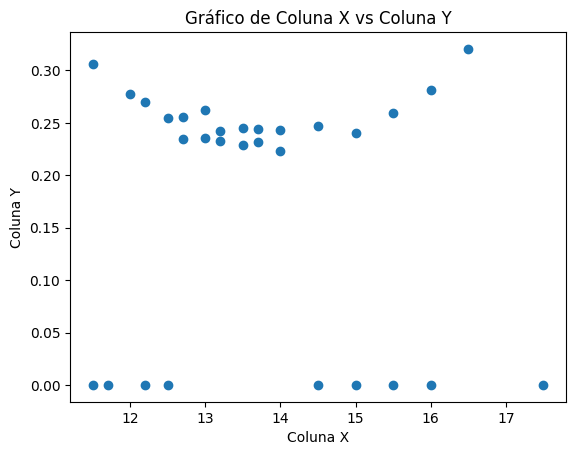

In [135]:
import pandas as pd
import matplotlib.pyplot as plt

# Plotando um gráfico de linha utilizando as colunas 'coluna_x' e 'coluna_y'
plt.scatter(dados_abev_30dias['strike'], dados_abev_30dias['vol_implicita'])

# Adicionando rótulos aos eixos e título
plt.xlabel('Coluna X')
plt.ylabel('Coluna Y')
plt.title('Gráfico de Coluna X vs Coluna Y')

# Exibindo o gráfico
plt.show()

Equação ajustada: y = 0.006(x - 13.28)^2 + 0.21646176411012066
Coeficiente de correlação de Pearson: -0.3155


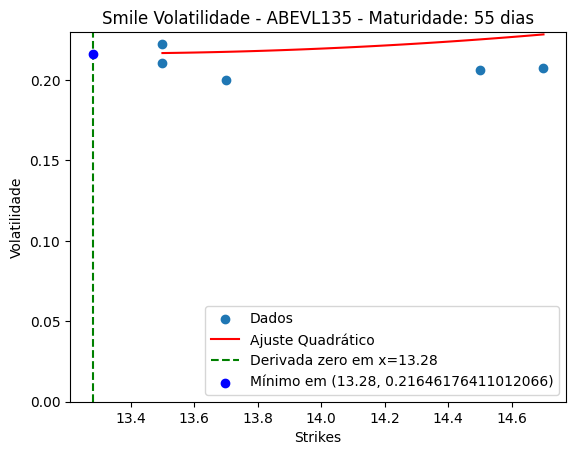

In [51]:
fitar_superficie(dados_b3_abev_04102024_dias_ate_vencimento_55, 55, spot_ABEV, dados_b3_abev_04102024_dias_ate_vencimento_55.iloc[0]['cod_neg'])

Equação ajustada: y = 0.047(x - 13.28)^2 + 0.11253797276867526
Coeficiente de correlação de Pearson: 0.4470


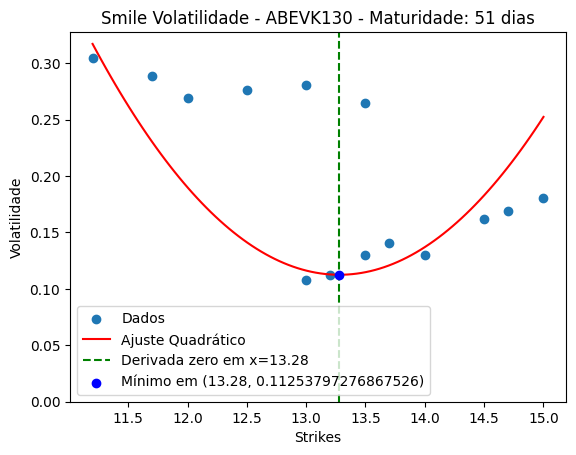

In [53]:
fitar_superficie(dados_b3_abev_11102024_dias_ate_vencimento_51, 51, spot_ABEV, dados_b3_abev_04102024_dias_ate_vencimento_30.iloc[0]['cod_neg'])

Equação ajustada: y = 0.065(x - 13.28)^2 + 0.06892654364991836
Coeficiente de correlação de Pearson: 0.2595


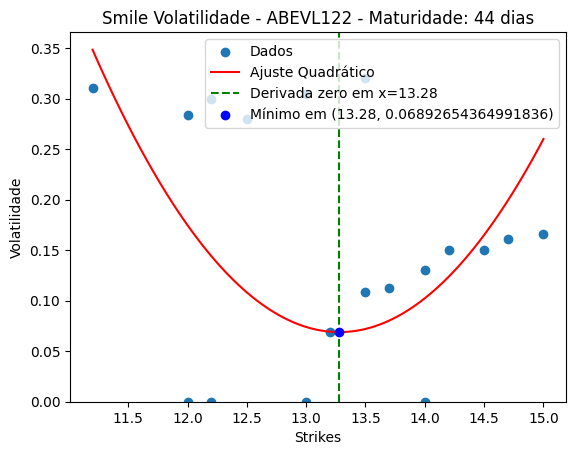

In [54]:
fitar_superficie(dados_b3_abev_18102024_dias_ate_vencimento_44, 44, spot_ABEV, dados_b3_abev_18102024_dias_ate_vencimento_44.iloc[0]['cod_neg'])

Equação ajustada: y = 0.007(x - 13.28)^2 + 0.23682176393683085
Coeficiente de correlação de Pearson: 0.6747


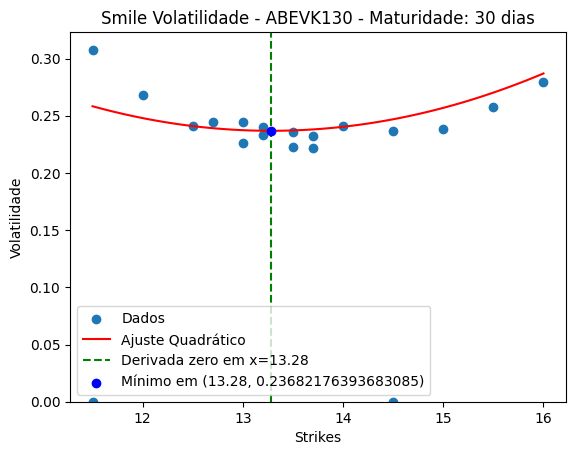

In [50]:
fitar_superficie(dados_b3_abev_04102024_dias_ate_vencimento_30, 30, spot_ABEV, dados_b3_abev_04102024_dias_ate_vencimento_30.iloc[0]['cod_neg'])

C:\Users\Public\Documents\Wondershare\CreatorTemp\ipykernel_15596\1152073530.py:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  dados_validos.loc[:, 'callPut'] = dados_validos['callPut'].replace({'call': 0, 'put': 1})
C:\Users\Public\Documents\Wondershare\CreatorTemp\ipykernel_15596\1152073530.py:7: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  dados_faltantes.loc[:, 'callPut'] = dados_faltantes['callPut'].replace({'call': 0, 'put': 1})
C:\Users\Public\Documents\Wondershare\CreatorTemp\ipykernel_15596\1152073530.py:9: FutureWarni

Equação ajustada: y = 0.062(x - 13.28)^2 + 0.06892654364991836
Coeficiente de correlação de Pearson: 0.2531


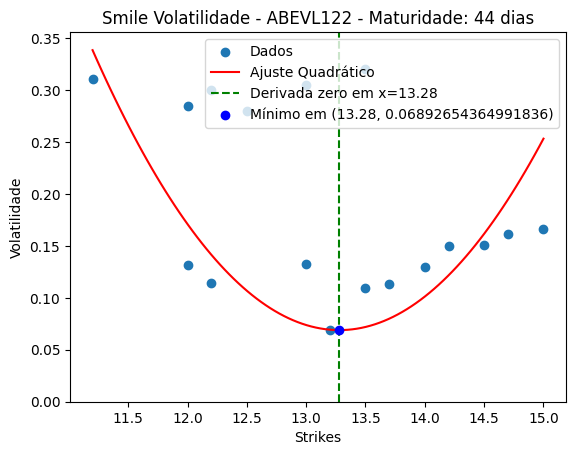

In [55]:
fittar_superficie_com_predicoes_para_nao_convergentes(dados_b3_abev_18102024_dias_ate_vencimento_44, spot_ABEV, 44)

<h3>ITSA</h3>

In [26]:
dados_b3_itsa

dados_b3_itsa.loc[dados_b3_itsa['vol_implicita'] == -1, 'vol_implicita'] = 0

dados_b3_itsa_04_10_2024 = dados_b3_itsa[dados_b3_itsa['dtPregao'] == '2024.10.04']
dados_b3_itsa_11_10_2024 = dados_b3_itsa[dados_b3_itsa['dtPregao'] == '2024.10.11']
dados_b3_itsa_18_10_2024 = dados_b3_itsa[dados_b3_itsa['dtPregao'] == '2024.10.18']

dados_b3_itsa_04102024_dias_ate_vencimento_30 = dados_b3_itsa_04_10_2024[dados_b3_itsa_04_10_2024['diasAteVencimento'] == 30]
dados_b3_itsa_04102024_dias_ate_vencimento_55 = dados_b3_itsa_04_10_2024[dados_b3_itsa_04_10_2024['diasAteVencimento'] == 55]

dados_b3_itsa_04102024_dias_ate_vencimento_51 = dados_b3_itsa_11_10_2024[dados_b3_itsa_11_10_2024['diasAteVencimento'] == 51]

dados_b3_itsa_18102024_dias_ate_vencimento_44 = dados_b3_itsa_18_10_2024[dados_b3_itsa_18_10_2024['diasAteVencimento'] == 44]

In [61]:
print(dados_b3_itsa_18_10_2024['diasAteVencimento'].unique())
print("---")
# print(dados_b3_itsa_11102024_dias_ate_vencimento_51['diasAteVencimento'].unique())
# print("---")
# print(dados_b3_itsa_18102024_dias_ate_vencimento_44['diasAteVencimento'].unique())

# print("30 dias até o vencimento - dia 04 - "  + str((dados_b3_itsa_04_10_2024[dados_b3_itsa_04_10_2024['diasAteVencimento'] == 30]).shape[0]))
# print("55 dias até o vencimento - dia 04 - "  + str((dados_b3_itsa_04_10_2024[dados_b3_itsa_04_10_2024['diasAteVencimento'] == 55]).shape[0]))
# print("51 dias até o vencimento - dia 11 - "  + str((dados_b3_itsa_11_10_2024[dados_b3_itsa_11_10_2024['diasAteVencimento'] == 51]).shape[0]))
# print("44 dias até o vencimento - dia 18 - "  + str((dados_b3_itsa_18_10_2024[dados_b3_itsa_18_10_2024['diasAteVencimento'] == 44]).shape[0]))
# # print("30 dias até o vencimento "  + str((dados_b3_abev[dados_b3_abev['diasAteVencimento'] == 30]).shape[0]))

# dados_abev_30dias = dados_b3_abev[dados_b3_abev['diasAteVencimento'] == 30]
# dados_abev_30dias.loc[dados_abev_30dias['vol_implicita'] == -1, 'vol_implicita'] = 0
# dados_abev_30dias.sort_values(by='strike')

[44]
---


Equação ajustada: y = 0.011(x - 10.62)^2 + 0.1811491378078286
Coeficiente de correlação de Pearson: 0.3966


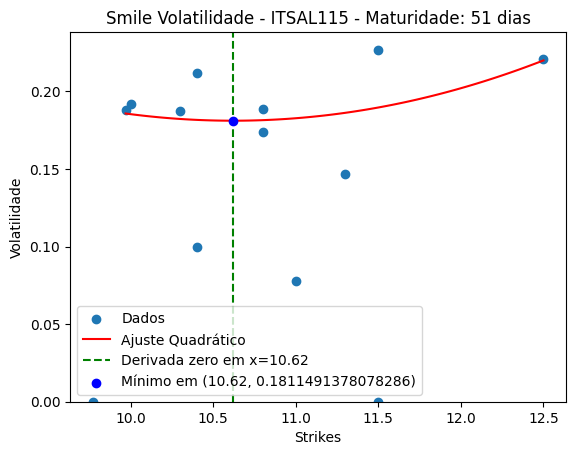

C:\Users\Public\Documents\Wondershare\CreatorTemp\ipykernel_17156\4107859896.py:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  dados_validos.loc[:, 'callPut'] = dados_validos['callPut'].replace({'call': 0, 'put': 1})
C:\Users\Public\Documents\Wondershare\CreatorTemp\ipykernel_17156\4107859896.py:9: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '[0.202 0.202 0.202 0.202 0.202 0.202 0.202 0.202 0.202 0.202 0.202 0.202
 0.202]' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  dados_validos.loc[:, 'diasAteVencimento'] = (dados_validos['diasAteVencimento'] / 252.0).round(3)


Equação ajustada: y = 0.008(x - 10.62)^2 + 0.1847741487813634
Coeficiente de correlação de Pearson: 0.4438


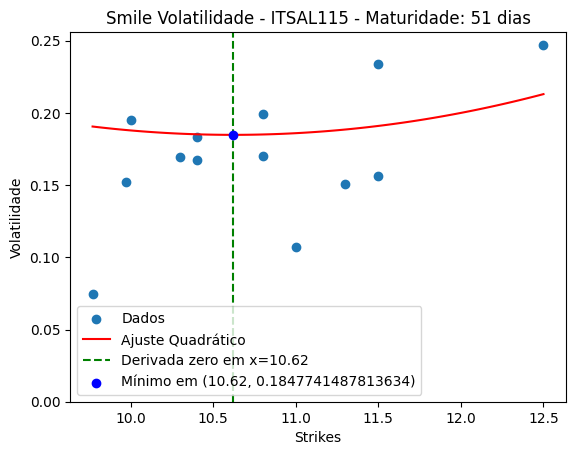

In [21]:
dados_b3_itsa_04102024_dias_ate_vencimento_51 = dados_b3_itsa_11_10_2024[dados_b3_itsa_11_10_2024['diasAteVencimento'] == 51]

fitar_superficie(dados_b3_itsa_04102024_dias_ate_vencimento_51, 51, spot_ITSA, dados_b3_itsa_04102024_dias_ate_vencimento_51.iloc[0]['cod_neg'])

fittar_superficie_predita(dados_b3_itsa_04102024_dias_ate_vencimento_51, spot_ITSA, 51)

Equação ajustada: y = 0.011(x - 10.61)^2 + 0.16959748532307573
Coeficiente de correlação de Pearson: 0.3515


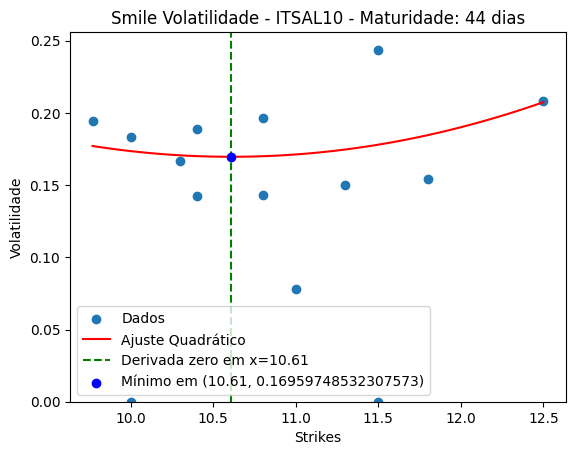

C:\Users\Public\Documents\Wondershare\CreatorTemp\ipykernel_17156\4107859896.py:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  dados_validos.loc[:, 'callPut'] = dados_validos['callPut'].replace({'call': 0, 'put': 1})
C:\Users\Public\Documents\Wondershare\CreatorTemp\ipykernel_17156\4107859896.py:9: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '[0.175 0.175 0.175 0.175 0.175 0.175 0.175 0.175 0.175 0.175 0.175 0.175
 0.175 0.175]' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  dados_validos.loc[:, 'diasAteVencimento'] = (dados_validos['diasAteVencimento'] / 252.0).round(3)


Equação ajustada: y = 0.021(x - 10.61)^2 + 0.16224067456250915
Coeficiente de correlação de Pearson: 0.6383


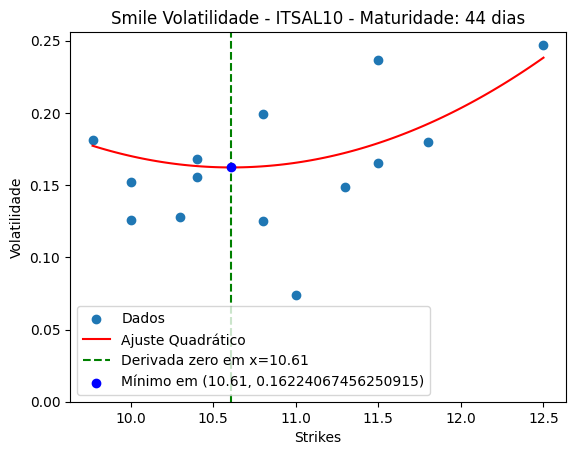

In [37]:

dados_b3_itsa_18102024_dias_ate_vencimento_44 = dados_b3_itsa_18_10_2024[dados_b3_itsa_18_10_2024['diasAteVencimento'] == 44]

fitar_superficie(dados_b3_itsa_18102024_dias_ate_vencimento_44, 44, spot_ITSA_18_10_2024, dados_b3_itsa_18102024_dias_ate_vencimento_44.iloc[0]['cod_neg'])

fittar_superficie_predita(dados_b3_itsa_18102024_dias_ate_vencimento_44, spot_ITSA_18_10_2024, 44)

C:\Users\Public\Documents\Wondershare\CreatorTemp\ipykernel_17156\2554654546.py:6: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  dados_validos.loc[:, 'callPut'] = dados_validos['callPut'].replace({'call': 0, 'put': 1})
C:\Users\Public\Documents\Wondershare\CreatorTemp\ipykernel_17156\2554654546.py:10: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  dados_faltantes.loc[:, 'callPut'] = dados_faltantes['callPut'].replace({'call': 0, 'put': 1})
C:\Users\Public\Documents\Wondershare\CreatorTemp\ipykernel_17156\2554654546.py:12: FutureWar

Equação ajustada: y = 0.016(x - 10.62)^2 + 0.1716546680200714
Coeficiente de correlação de Pearson: -0.0576


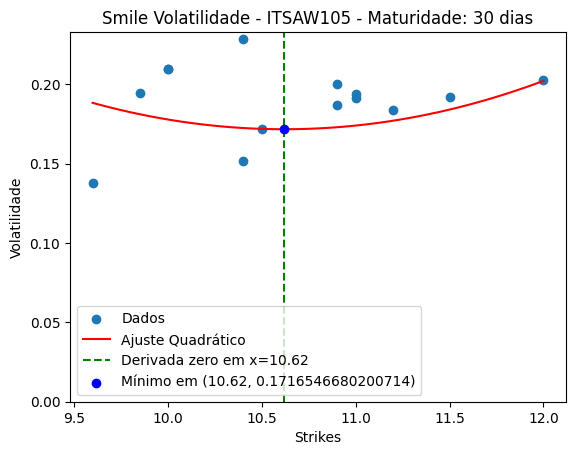

Equação ajustada: y = 0.026(x - 10.62)^2 + 0.1716546680200714
Coeficiente de correlação de Pearson: 0.2156


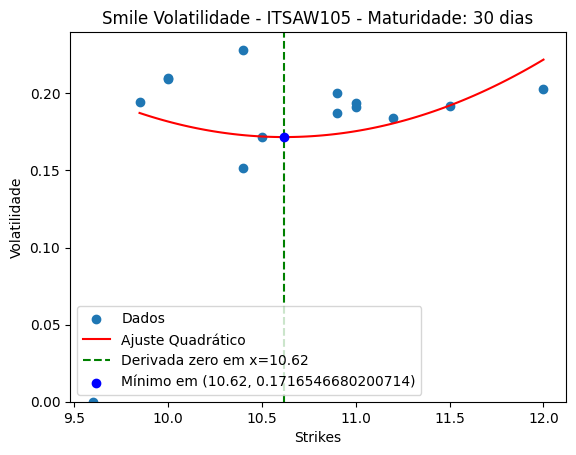

C:\Users\Public\Documents\Wondershare\CreatorTemp\ipykernel_17156\4107859896.py:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  dados_validos.loc[:, 'callPut'] = dados_validos['callPut'].replace({'call': 0, 'put': 1})
C:\Users\Public\Documents\Wondershare\CreatorTemp\ipykernel_17156\4107859896.py:9: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '[0.119 0.119 0.119 0.119 0.119 0.119 0.119 0.119 0.119 0.119 0.119 0.119
 0.119 0.119]' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  dados_validos.loc[:, 'diasAteVencimento'] = (dados_validos['diasAteVencimento'] / 252.0).round(3)
C:\Users\Public\Documents\Wondershare\CreatorTemp\ipykernel_17156\4107859

Equação ajustada: y = 0.066(x - 10.62)^2 + 0.16959480795708068
Coeficiente de correlação de Pearson: 0.1977


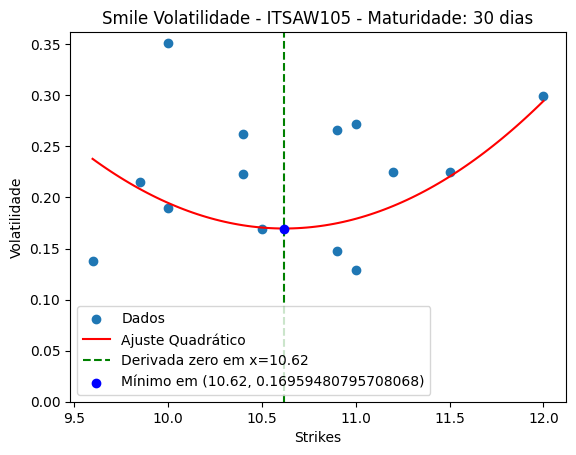

In [29]:

dados_b3_itsa_04102024_dias_ate_vencimento_30 = dados_b3_itsa_04_10_2024[dados_b3_itsa_04_10_2024['diasAteVencimento'] == 30]
fittar_superficie_com_predicoes_para_nao_convergentes(dados_b3_itsa_04102024_dias_ate_vencimento_30, spot_ITSA, 30)

fitar_superficie(dados_b3_itsa_04102024_dias_ate_vencimento_30, 30, spot_ITSA, dados_b3_itsa_04102024_dias_ate_vencimento_30.iloc[0]['cod_neg'])

fittar_superficie_predita(dados_b3_itsa_04102024_dias_ate_vencimento_30, spot_ITSA, 30)


Equação ajustada: y = 0.011(x - 10.62)^2 + 0.1895787204986725
Coeficiente de correlação de Pearson: 0.3924


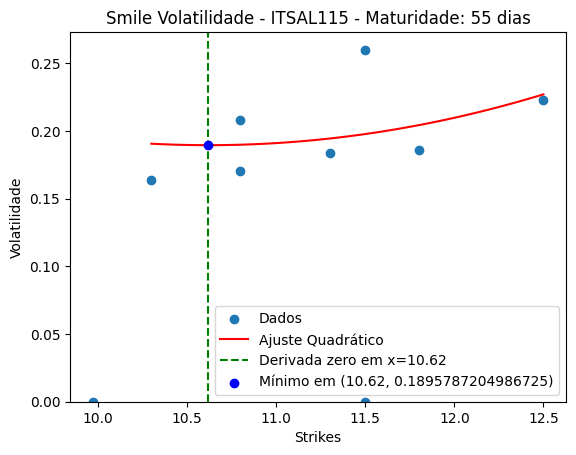

In [66]:
fitar_superficie(dados_b3_itsa_04102024_dias_ate_vencimento_55, 55, spot_ITSA, dados_b3_itsa_04102024_dias_ate_vencimento_55.iloc[0]['cod_neg'])

Equação ajustada: y = 0.011(x - 10.62)^2 + 0.18114913780782865
Coeficiente de correlação de Pearson: 0.3966


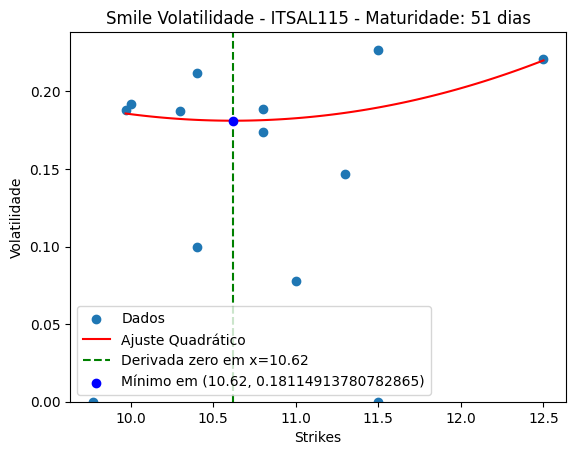

In [67]:
fitar_superficie(dados_b3_itsa_04102024_dias_ate_vencimento_51, 51, spot_ITSA, dados_b3_itsa_04102024_dias_ate_vencimento_51.iloc[0]['cod_neg'])

Equação ajustada: y = 0.011(x - 10.62)^2 + 0.16959748532307575
Coeficiente de correlação de Pearson: 0.3539


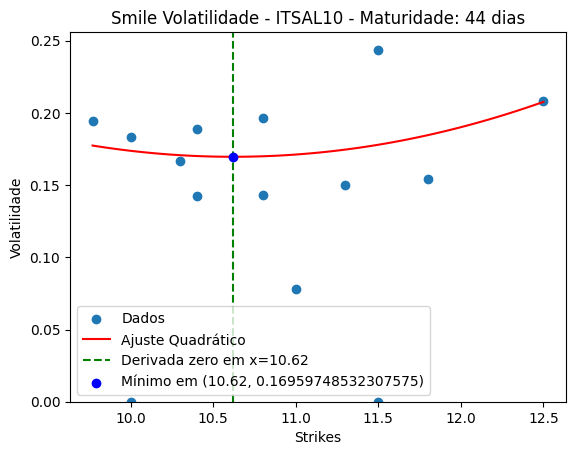

In [68]:
fitar_superficie(dados_b3_itsa_18102024_dias_ate_vencimento_44, 44, spot_ITSA, dados_b3_itsa_18102024_dias_ate_vencimento_44.iloc[0]['cod_neg'])


Equação ajustada: y = 0.020(x - 10.62)^2 + 0.16875029845859002
Coeficiente de correlação de Pearson: 0.3229


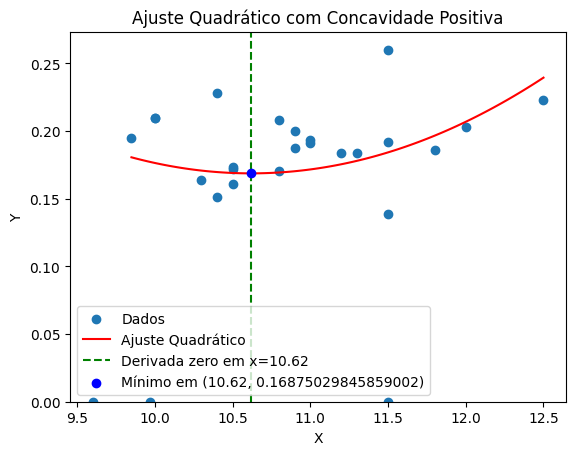

In [15]:
fitar_superficie(dados_b3_itsa, 30, spot=spot_ITSA)

<h3>B3SA</h3>

In [40]:
dados_b3_b3sa.sort_values(by='strike')

dados_b3_b3sa_04_10_2024 = dados_b3_b3sa[dados_b3_b3sa['dtPregao'] == '2024.10.04']
dados_b3_b3sa_11_10_2024 = dados_b3_b3sa[dados_b3_b3sa['dtPregao'] == '2024.10.11']
dados_b3_b3sa_18_10_2024 = dados_b3_b3sa[dados_b3_b3sa['dtPregao'] == '2024.10.18']

In [43]:
dados_b3_b3sa_04_10_2024

,Unnamed: 0,cod_neg,dtPregao,diasAteVencimento,datven,strike,premio,taxaDeJuros,spot,callPut,dado_original,vol_implicita
24,2137,B3SAL12,2024.10.04,55,20241220.0,12.00,0.50,0.11,10.75,call,1,0.431685
25,2140,B3SAX12,2024.10.04,55,20241220.0,12.00,0.75,0.11,10.75,put,1,0.000000
26,2141,B3SAX16,2024.10.04,55,20241220.0,16.00,0.16,0.11,10.75,put,1,0.000000
27,2148,B3SAO123,2024.10.04,116,20250321.0,12.30,0.30,0.11,10.75,put,1,0.000000
28,2151,B3SAL131,2024.10.04,55,20241220.0,13.10,0.09,0.11,10.75,call,1,0.305296
29,2152,B3SAL116,2024.10.04,55,20241220.0,11.60,0.40,0.11,10.75,call,1,0.314981
30,2177,B3SAK107,2024.10.04,30,20241114.0,10.70,0.64,0.11,10.75,call,1,0.368522
31,2178,B3SAK109,2024.10.04,30,20241114.0,10.90,0.51,0.11,10.75,call,1,0.347420
32,2179,B3SAK112,2024.10.04,30,20241114.0,11.20,0.38,0.11,10.75,call,1,0.345400
33,2180,B3SAK114,2024.10.04,30,20241114.0,11.40,0.29,0.11,10.75,call,1,0.331405


In [33]:
print(dados_b3_abev_04_10_2024['diasAteVencimento'].unique())
print(dados_b3_abev_11_10_2024['diasAteVencimento'].unique())
print(dados_b3_abev_18_10_2024['diasAteVencimento'].unique())

[30 55]
[51]
[44]


30 dias até o vencimento 33
55 dias até o vencimento 16


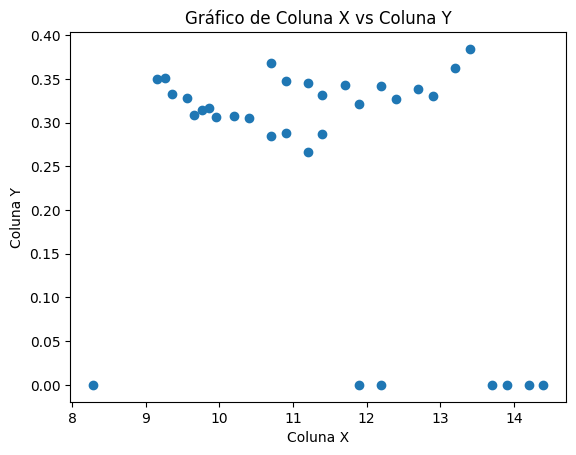

In [212]:
print("30 dias até o vencimento "  + str((dados_b3_b3sa[dados_b3_b3sa['diasAteVencimento'] == 30]).shape[0]))
print("55 dias até o vencimento "  + str((dados_b3_b3sa[dados_b3_b3sa['diasAteVencimento'] == 55]).shape[0]))
# print("30 dias até o vencimento "  + str((dados_b3_b3sa[dados_b3_b3sa['diasAteVencimento'] == 30]).shape[0]))

dados_b3_b3sa_30dias = dados_b3_b3sa[dados_b3_b3sa['diasAteVencimento'] == 30]
dados_b3_b3sa_30dias.loc[dados_b3_b3sa_30dias['vol_implicita'] == -1, 'vol_implicita'] = 0
dados_b3_b3sa_30dias.sort_values(by='strike')

import pandas as pd
import matplotlib.pyplot as plt

# Plotando um gráfico de linha utilizando as colunas 'coluna_x' e 'coluna_y'
plt.scatter(dados_b3_b3sa_30dias['strike'], dados_b3_b3sa_30dias['vol_implicita'])

# Adicionando rótulos aos eixos e título
plt.xlabel('Coluna X')
plt.ylabel('Coluna Y')
plt.title('Gráfico de Coluna X vs Coluna Y')

# Exibindo o gráfico
plt.show()

Equação ajustada: y = 0.005(x - 10.75)^2 + 0.32675212760930583
Coeficiente de correlação de Pearson: 0.5893


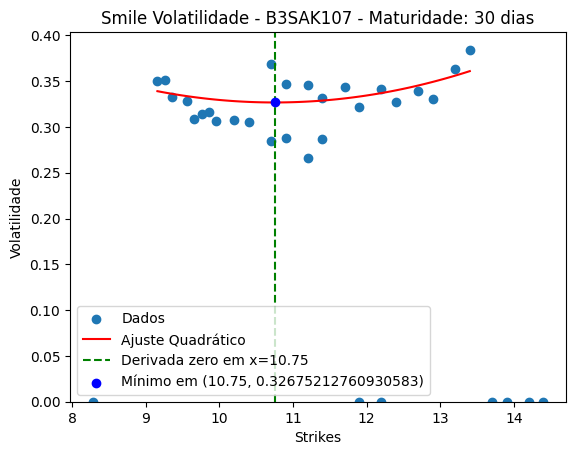

C:\Users\Public\Documents\Wondershare\CreatorTemp\ipykernel_17156\2554654546.py:6: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  dados_validos.loc[:, 'callPut'] = dados_validos['callPut'].replace({'call': 0, 'put': 1})
C:\Users\Public\Documents\Wondershare\CreatorTemp\ipykernel_17156\2554654546.py:10: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  dados_faltantes.loc[:, 'callPut'] = dados_faltantes['callPut'].replace({'call': 0, 'put': 1})
C:\Users\Public\Documents\Wondershare\CreatorTemp\ipykernel_17156\2554654546.py:12: FutureWar

Equação ajustada: y = 0.006(x - 10.75)^2 + 0.32675212760930583
Coeficiente de correlação de Pearson: 0.5770


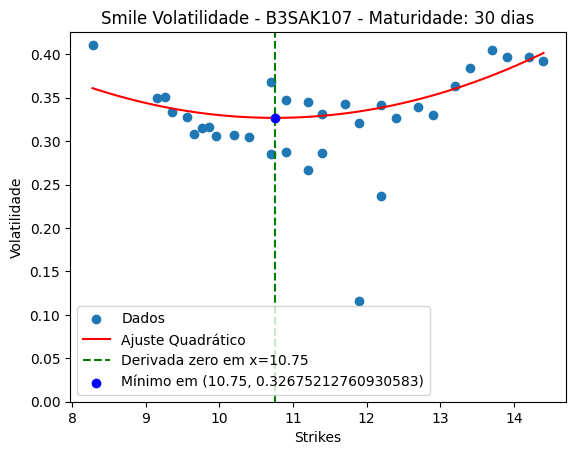

C:\Users\Public\Documents\Wondershare\CreatorTemp\ipykernel_17156\4107859896.py:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  dados_validos.loc[:, 'callPut'] = dados_validos['callPut'].replace({'call': 0, 'put': 1})
C:\Users\Public\Documents\Wondershare\CreatorTemp\ipykernel_17156\4107859896.py:9: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '[0.119 0.119 0.119 0.119 0.119 0.119 0.119 0.119 0.119 0.119 0.119 0.119
 0.119 0.119 0.119 0.119 0.119 0.119 0.119 0.119 0.119 0.119 0.119 0.119
 0.119 0.119 0.119 0.119 0.119 0.119 0.119 0.119 0.119]' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  dados_validos.loc[:, 'diasAteVencimento'] = (dados_valid

Equação ajustada: y = 0.001(x - 10.75)^2 + 0.3718768432292817
Coeficiente de correlação de Pearson: 0.4174


C:\Users\Public\Documents\Wondershare\CreatorTemp\ipykernel_17156\4107859896.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dados_validos['vol_implicita'] = vol_implicita_pred


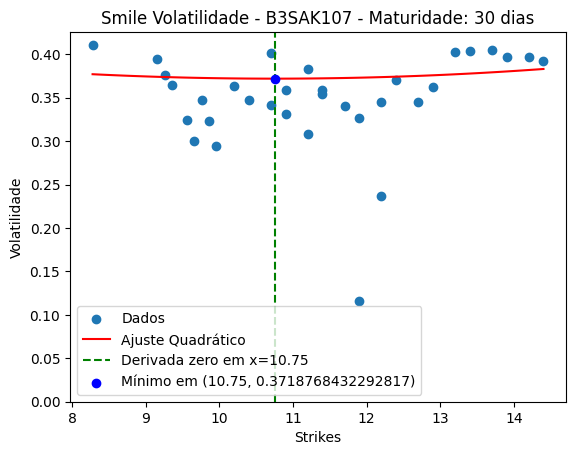

In [49]:
dados_b3_b3sa_04102024_dias_ate_vencimento_30 = dados_b3_b3sa_04_10_2024[dados_b3_b3sa_04_10_2024['diasAteVencimento'] == 30]

fitar_superficie(dados_b3_b3sa_04102024_dias_ate_vencimento_30, 30, spot_B3SA_04_10_2024, dados_b3_b3sa_04102024_dias_ate_vencimento_30.iloc[0]['cod_neg'])

fittar_superficie_com_predicoes_para_nao_convergentes(dados_b3_b3sa_04102024_dias_ate_vencimento_30, spot_B3SA_04_10_2024, 30)

fittar_superficie_predita(dados_b3_b3sa_04102024_dias_ate_vencimento_30, spot_B3SA_04_10_2024, 30)


Equação ajustada: y = 0.002(x - 10.69)^2 + 0.310469824449826
Coeficiente de correlação de Pearson: 0.1393


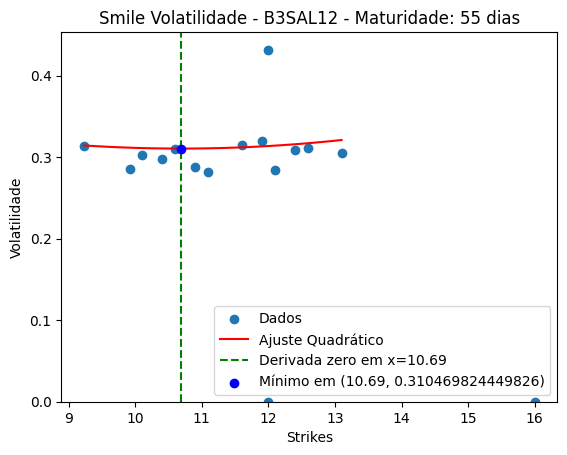

C:\Users\Public\Documents\Wondershare\CreatorTemp\ipykernel_17156\2554654546.py:6: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  dados_validos.loc[:, 'callPut'] = dados_validos['callPut'].replace({'call': 0, 'put': 1})
C:\Users\Public\Documents\Wondershare\CreatorTemp\ipykernel_17156\2554654546.py:10: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  dados_faltantes.loc[:, 'callPut'] = dados_faltantes['callPut'].replace({'call': 0, 'put': 1})
C:\Users\Public\Documents\Wondershare\CreatorTemp\ipykernel_17156\2554654546.py:12: FutureWar

Equação ajustada: y = 0.004(x - 10.69)^2 + 0.310469824449826
Coeficiente de correlação de Pearson: -0.4422


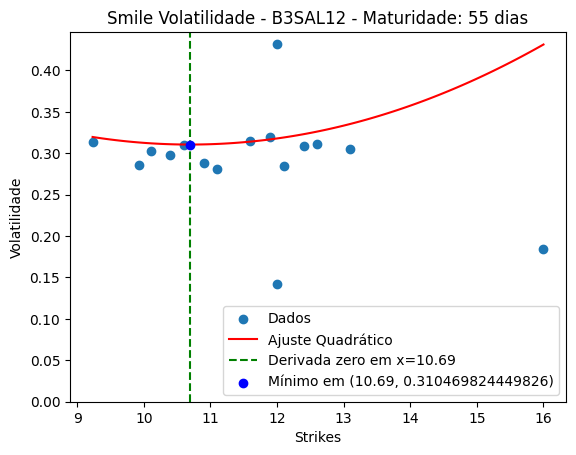

C:\Users\Public\Documents\Wondershare\CreatorTemp\ipykernel_17156\4107859896.py:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  dados_validos.loc[:, 'callPut'] = dados_validos['callPut'].replace({'call': 0, 'put': 1})
C:\Users\Public\Documents\Wondershare\CreatorTemp\ipykernel_17156\4107859896.py:9: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '[0.218 0.218 0.218 0.218 0.218 0.218 0.218 0.218 0.218 0.218 0.218 0.218
 0.218 0.218 0.218 0.218]' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  dados_validos.loc[:, 'diasAteVencimento'] = (dados_validos['diasAteVencimento'] / 252.0).round(3)
C:\Users\Public\Documents\Wondershare\CreatorTemp\ipykernel_1

Equação ajustada: y = 0.006(x - 10.69)^2 + 0.3374123334705507
Coeficiente de correlação de Pearson: -0.4554


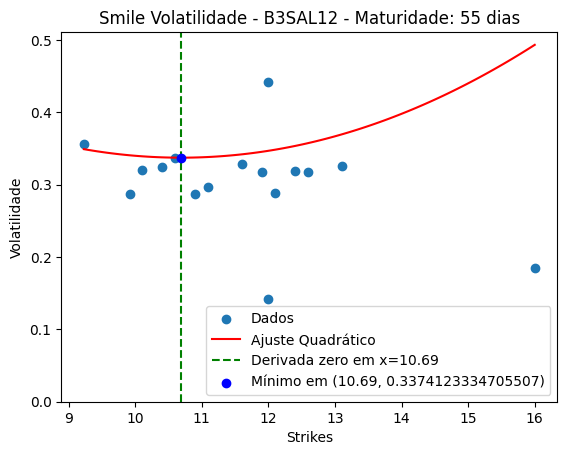

In [48]:
dados_b3_b3sa_11102024_dias_ate_vencimento_55 = dados_b3_b3sa_04_10_2024[dados_b3_b3sa_04_10_2024['diasAteVencimento'] == 55]

fitar_superficie(dados_b3_b3sa_11102024_dias_ate_vencimento_55, 55, spot_B3SA_11_10_2024, dados_b3_b3sa_11102024_dias_ate_vencimento_55.iloc[0]['cod_neg'])

fittar_superficie_com_predicoes_para_nao_convergentes(dados_b3_b3sa_11102024_dias_ate_vencimento_55, spot_B3SA_11_10_2024, 55)

fittar_superficie_predita(dados_b3_b3sa_11102024_dias_ate_vencimento_55, spot_B3SA_11_10_2024, 55)

Equação ajustada: y = 0.005(x - 10.65)^2 + 0.29296773074095345
Coeficiente de correlação de Pearson: 0.4905


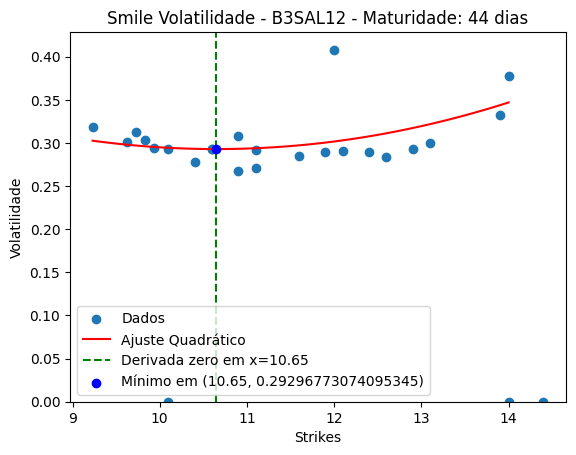

C:\Users\Public\Documents\Wondershare\CreatorTemp\ipykernel_17156\2554654546.py:6: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  dados_validos.loc[:, 'callPut'] = dados_validos['callPut'].replace({'call': 0, 'put': 1})
C:\Users\Public\Documents\Wondershare\CreatorTemp\ipykernel_17156\2554654546.py:10: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  dados_faltantes.loc[:, 'callPut'] = dados_faltantes['callPut'].replace({'call': 0, 'put': 1})
C:\Users\Public\Documents\Wondershare\CreatorTemp\ipykernel_17156\2554654546.py:12: FutureWar

Equação ajustada: y = 0.000(x - 10.65)^2 + 0.29296773074095345
Coeficiente de correlação de Pearson: 0.0357


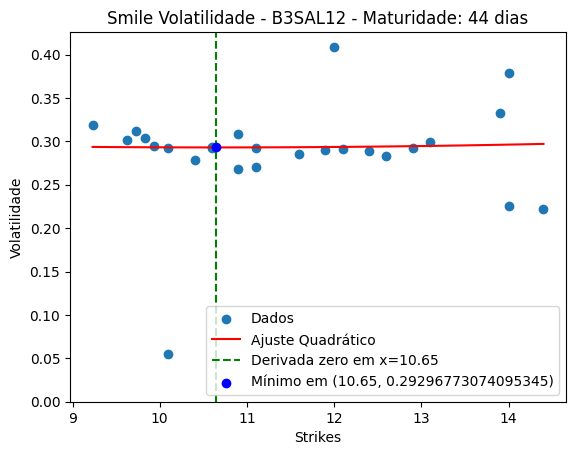

C:\Users\Public\Documents\Wondershare\CreatorTemp\ipykernel_17156\4107859896.py:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  dados_validos.loc[:, 'callPut'] = dados_validos['callPut'].replace({'call': 0, 'put': 1})
C:\Users\Public\Documents\Wondershare\CreatorTemp\ipykernel_17156\4107859896.py:9: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '[0.175 0.175 0.175 0.175 0.175 0.175 0.175 0.175 0.175 0.175 0.175 0.175
 0.175 0.175 0.175 0.175 0.175 0.175 0.175 0.175 0.175 0.175 0.175 0.175
 0.175 0.175]' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  dados_validos.loc[:, 'diasAteVencimento'] = (dados_validos['diasAteVencimento'] / 252.0).round(3)


Equação ajustada: y = 0.002(x - 10.65)^2 + 0.26134004373977343
Coeficiente de correlação de Pearson: 0.0827


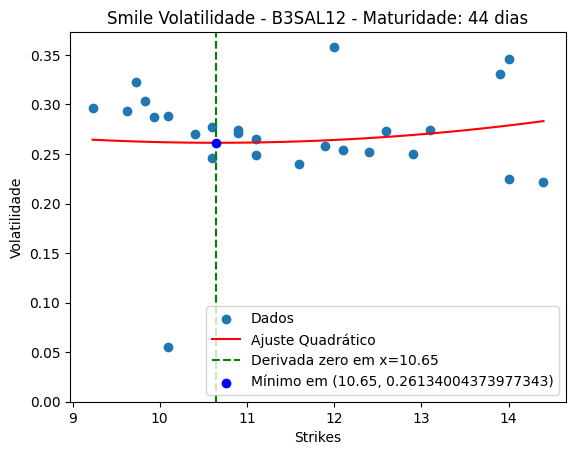

In [51]:
dados_b3_b3sa_18102024_dias_ate_vencimento_44 = dados_b3_b3sa_18_10_2024[dados_b3_b3sa_18_10_2024['diasAteVencimento'] == 44]

fitar_superficie(dados_b3_b3sa_18102024_dias_ate_vencimento_44, 44, spot_B3SA_18_10_2024, dados_b3_b3sa_18102024_dias_ate_vencimento_44.iloc[0]['cod_neg'])

fittar_superficie_com_predicoes_para_nao_convergentes(dados_b3_b3sa_18102024_dias_ate_vencimento_44, spot_B3SA_18_10_2024, 44)

fittar_superficie_predita(dados_b3_b3sa_18102024_dias_ate_vencimento_44, spot_B3SA_18_10_2024, 44)

<h3>BBDC</h3>

In [208]:
dados_b3_bbdc

,cod_neg,data_pregao,diasAteVencimento,datven,strike,premio,taxaDeJuros,spot,callPut,vol_implicita
2605,BBDCX13,20241004,55,20241220,13.00,0.26,0.11,15.06,put,0.405043
2612,BBDCK140,20241004,30,20241114,14.00,0.43,0.11,15.06,call,-1.000000
2613,BBDCW132,20241004,30,20241114,13.20,0.23,0.11,15.06,put,0.469749
2629,BBDCK141,20241004,30,20241114,14.10,0.25,0.11,15.06,call,-1.000000
2630,BBDCK151,20241004,30,20241114,15.10,0.10,0.11,15.06,call,-1.000000
...,...,...,...,...,...,...,...,...,...,...
2830,BBDCW615,20241004,30,20241114,6.15,0.44,0.11,15.06,put,-1.000000
2851,BBDCK19,20241004,30,20241114,19.00,0.03,0.11,15.06,call,0.355559
2854,BBDCK789,20241004,30,20241114,7.89,0.07,0.11,15.06,call,-1.000000
2855,BBDCK163,20241004,30,20241114,16.30,0.27,0.11,15.06,call,0.308623


In [209]:
print("30 dias até o vencimento "  + str((dados_b3_bbdc[dados_b3_bbdc['diasAteVencimento'] == 30]).shape[0]))
print("55 dias até o vencimento "  + str((dados_b3_bbdc[dados_b3_bbdc['diasAteVencimento'] == 55]).shape[0]))
# print("30 dias até o vencimento "  + str((dados_b3_bbdc[dados_b3_bbdc['diasAteVencimento'] == 30]).shape[0]))

dados_b3_bbdc_30dias = dados_b3_bbdc[dados_b3_bbdc['diasAteVencimento'] == 30]
dados_b3_bbdc_30dias.loc[dados_b3_bbdc_30dias['vol_implicita'] == -1, 'vol_implicita'] = 0
dados_b3_bbdc_30dias.sort_values(by='strike')
dados_b3_bbdc_30dias.to_csv("dados_bbdc.csv")

30 dias até o vencimento 40
55 dias até o vencimento 23


PermissionError: [Errno 13] Permission denied: 'dados_bbdc.csv'

30 dias até o vencimento 40
55 dias até o vencimento 23


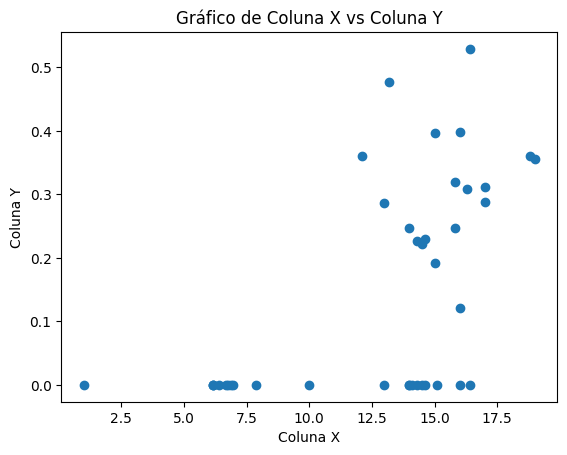

In [151]:
print("30 dias até o vencimento "  + str((dados_b3_bbdc[dados_b3_bbdc['diasAteVencimento'] == 30]).shape[0]))
print("55 dias até o vencimento "  + str((dados_b3_bbdc[dados_b3_bbdc['diasAteVencimento'] == 55]).shape[0]))
# print("30 dias até o vencimento "  + str((dados_b3_bbdc[dados_b3_bbdc['diasAteVencimento'] == 30]).shape[0]))

dados_b3_bbdc_30dias = dados_b3_bbdc[dados_b3_bbdc['diasAteVencimento'] == 30]
dados_b3_bbdc_30dias.loc[dados_b3_bbdc_30dias['vol_implicita'] == -1, 'vol_implicita'] = 0
dados_b3_bbdc_30dias.sort_values(by='strike')

import pandas as pd
import matplotlib.pyplot as plt

# Plotando um gráfico de linha utilizando as colunas 'coluna_x' e 'coluna_y'
plt.scatter(dados_b3_bbdc_30dias['strike'], dados_b3_bbdc_30dias['vol_implicita'])

# Adicionando rótulos aos eixos e título
plt.xlabel('Coluna X')
plt.ylabel('Coluna Y')
plt.title('Gráfico de Coluna X vs Coluna Y')

# Exibindo o gráfico
plt.show()

In [206]:
dados_b3_bbdc

,cod_neg,data_pregao,diasAteVencimento,datven,strike,premio,taxaDeJuros,spot,callPut
2605,BBDCX13,20241004,55,20241220,13.00,0.26,0.11,15.06,put
2612,BBDCK140,20241004,30,20241114,14.00,0.43,0.11,15.06,call
2613,BBDCW132,20241004,30,20241114,13.20,0.23,0.11,15.06,put
2629,BBDCK141,20241004,30,20241114,14.10,0.25,0.11,15.06,call
2630,BBDCK151,20241004,30,20241114,15.10,0.10,0.11,15.06,call
...,...,...,...,...,...,...,...,...,...
2830,BBDCW615,20241004,30,20241114,6.15,0.44,0.11,15.06,put
2851,BBDCK19,20241004,30,20241114,19.00,0.03,0.11,15.06,call
2854,BBDCK789,20241004,30,20241114,7.89,0.07,0.11,15.06,call
2855,BBDCK163,20241004,30,20241114,16.30,0.27,0.11,15.06,call


Equação ajustada: y = 0.011(x - 15.06)^2 + 0.19975003005295672
Coeficiente de correlação de Pearson: 0.4157


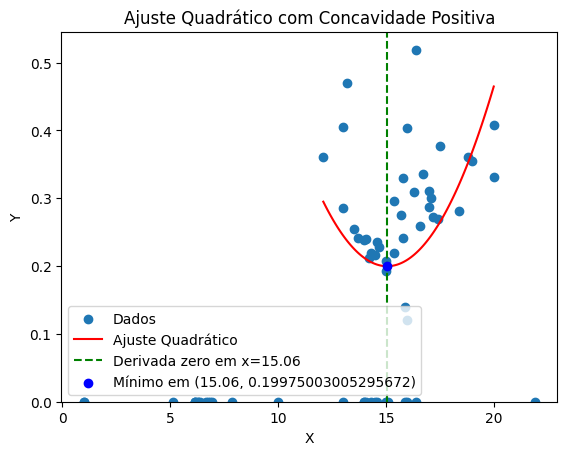

In [8]:
fitar_superficie(dados_b3_bbdc, 30, spot_BBDC)

In [18]:
dados_validos

NameError: name 'dados_validos' is not defined

C:\Users\Public\Documents\Wondershare\CreatorTemp\ipykernel_12472\1836165092.py:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  dados_validos.loc[:, 'callPut'] = dados_validos['callPut'].replace({'call': 0, 'put': 1})
C:\Users\Public\Documents\Wondershare\CreatorTemp\ipykernel_12472\1836165092.py:7: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  dados_faltantes.loc[:, 'callPut'] = dados_faltantes['callPut'].replace({'call': 0, 'put': 1})
C:\Users\Public\Documents\Wondershare\CreatorTemp\ipykernel_12472\1836165092.py:9: FutureWarni

Equação ajustada: y = 0.003(x - 15.06)^2 + 0.19975003005295672
Coeficiente de correlação de Pearson: 0.4820


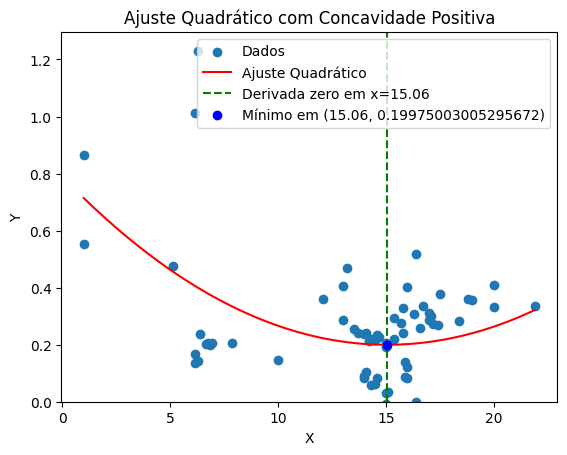

In [8]:
fittar_superficie_com_predicoes_para_nao_convergentes(dados_b3_bbdc, spot_BBDC, 30, 30)

<h3>MGLU</h3>

In [175]:
print("30 dias até o vencimento "  + str((dados_b3_mglu[dados_b3_mglu['diasAteVencimento'] == 30]).shape[0]))
print("55 dias até o vencimento "  + str((dados_b3_mglu[dados_b3_mglu['diasAteVencimento'] == 55]).shape[0]))
# print("30 dias até o vencimento "  + str((dados_b3_mglu[dados_b3_mglu['diasAteVencimento'] == 30]).shape[0]))

dados_b3_mglu_30dias = dados_b3_mglu[dados_b3_mglu['diasAteVencimento'] == 55]
dados_b3_mglu_30dias.loc[dados_b3_mglu_30dias['vol_implicita'] == -1, 'vol_implicita'] = 0
dados_b3_mglu_30dias.sort_values(by='strike')

30 dias até o vencimento 21
55 dias até o vencimento 9


,cod_neg,data_pregao,diasAteVencimento,datven,strike,premio,taxaDeJuros,spot,callPut,vol_implicita
6950,MGLUX570,20241004,55,20241220,5.7,0.07,0.11,9.67,put,0.000000
6951,MGLUX770,20241004,55,20241220,7.7,0.30,0.11,9.67,put,0.000000
6986,MGLUX780,20241004,55,20241220,7.8,0.35,0.11,9.67,put,0.000000
6987,MGLUX820,20241004,55,20241220,8.2,0.45,0.11,9.67,put,0.663440
6930,MGLUX880,20241004,55,20241220,8.8,0.64,0.11,9.67,put,0.647227
6932,MGLUX920,20241004,55,20241220,9.2,0.70,0.11,9.67,put,0.581585
6936,MGLUX930,20241004,55,20241220,9.3,0.84,0.11,9.67,put,0.638139
6786,MGLUL126,20241004,55,20241220,12.6,0.33,0.11,9.67,call,0.000000
6760,MGLUL205,20241004,55,20241220,20.5,0.03,0.11,9.67,call,0.000000


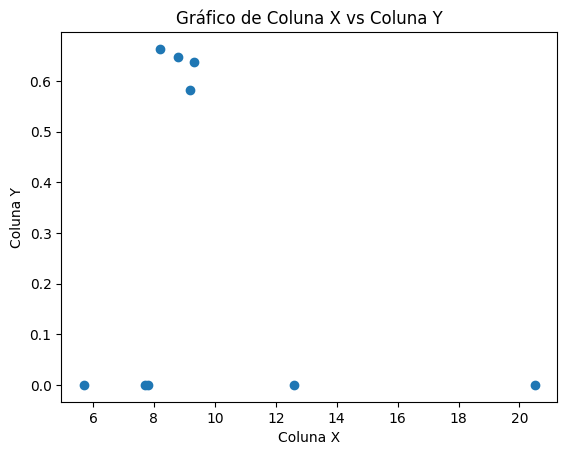

In [211]:


import pandas as pd
import matplotlib.pyplot as plt

# Plotando um gráfico de linha utilizando as colunas 'coluna_x' e 'coluna_y'
plt.scatter(dados_b3_mglu_30dias['strike'], dados_b3_mglu_30dias['vol_implicita'])

# Adicionando rótulos aos eixos e título
plt.xlabel('Coluna X')
plt.ylabel('Coluna Y')
plt.title('Gráfico de Coluna X vs Coluna Y')

# Exibindo o gráfico
plt.show()

Equação ajustada: y = 0.006(x - 9.67)^2 + 0.6390205064398105
Coeficiente de correlação de Pearson: -0.0080


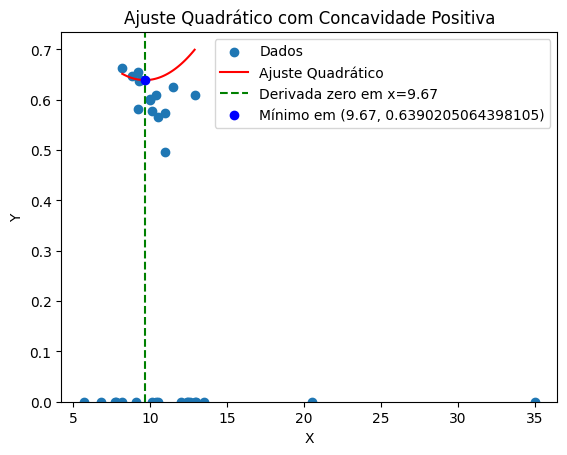

In [19]:

fitar_superficie(dados_b3_mglu, 30, spot=spot_MGLU)

<h3>GGBR</h3>

In [1]:
print("30 dias até o vencimento "  + str((dados_b3_ggbr[dados_b3_ggbr['diasAteVencimento'] == 30]).shape[0]))
print("55 dias até o vencimento "  + str((dados_b3_ggbr[dados_b3_ggbr['diasAteVencimento'] == 55]).shape[0]))
# print("30 dias até o vencimento "  + str((dados_b3_ggbr[dados_b3_ggbr['diasAteVencimento'] == 30]).shape[0]))

dados_b3_ggbr_30dias = dados_b3_ggbr[dados_b3_ggbr['diasAteVencimento'] == 30]
dados_b3_ggbr_30dias.loc[dados_b3_ggbr_30dias['vol_implicita'] == -1, 'vol_implicita'] = 0
dados_b3_ggbr_30dias.sort_values(by='strike')

import pandas as pd
import matplotlib.pyplot as plt

# Plotando um gráfico de linha utilizando as colunas 'coluna_x' e 'coluna_y'
plt.scatter(dados_b3_ggbr_30dias['strike'], dados_b3_ggbr_30dias['vol_implicita'])

# Adicionando rótulos aos eixos e título
plt.xlabel('Coluna X')
plt.ylabel('Coluna Y')
plt.title('Gráfico de Coluna X vs Coluna Y')

# Exibindo o gráfico
plt.show()

NameError: name 'dados_b3_ggbr' is not defined

Equação ajustada: y = 0.007(x - 19.18)^2 + 0.2430473075765999
Coeficiente de correlação de Pearson: 0.2430


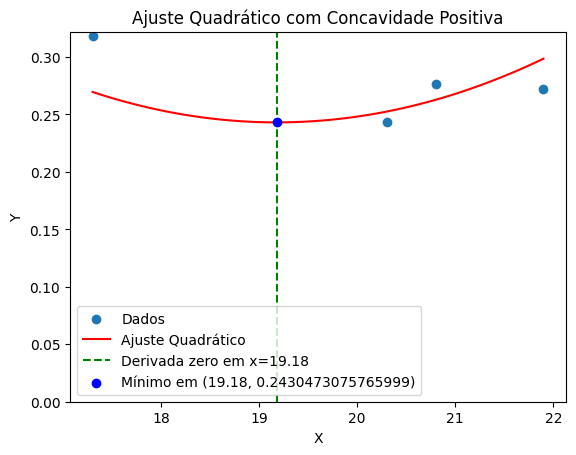

In [18]:
dados_b3_ggbr_30dias = dados_b3_ggbr[dados_b3_ggbr['diasAteVencimento'] == 55]
dados_b3_ggbr_30dias.loc[dados_b3_ggbr_30dias['vol_implicita'] == -1, 'vol_implicita'] = 0

fitar_superficie(dados_b3_ggbr_30dias, 30, spot=spot_GGBR)